![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples//colab/Training/multi_lingual/binary_text_classification/NLU_multi_lingual_training_sentiment_classifier_demo_stock_market.ipynb)


# Training a Sentiment Analysis Classifier with NLU 
## 2 Class Stock Market  Sentiment Classifier Training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator)  from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training  data  : 

<br> 

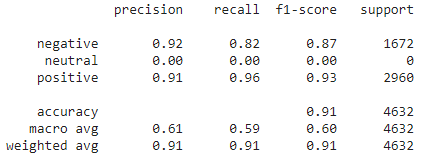


You can achieve these results or even better on this dataset with test  data  : 

<br> 

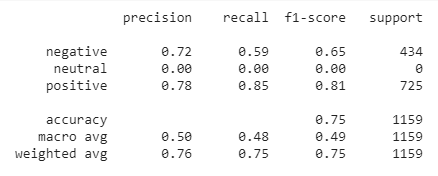


# 1. Install Java 8 and NLU

In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
  

import nlu

--2021-05-05 08:06:15--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.63K  --.-KB/s    in 0s      

2021-05-05 08:06:15 (33.4 MB/s) - written to stdout [1671/1671]

Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
     |████████████████████████████████| 204.8MB 72kB/s 
     |████████████████████████████████| 153kB 41.2MB/s 
     |████████████████████████████████| 204kB 22.8MB/s 
     |████████████████████████████████| 204kB 43.6MB/s 


# 2. Download Stock Market  Sentiment dataset 
https://www.kaggle.com/yash612/stockmarket-sentiment-dataset
#Context

Gathered Stock news from Multiple twitter Handles regarding Economic news dividing into two parts : Negative and positive.

In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/stock_data_multi_lingual.csv


--2021-05-05 08:08:09--  http://ckl-it.de/wp-content/uploads/2021/02/stock_data_multi_lingual.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 564444 (551K) [text/csv]
Saving to: ‘stock_data_multi_lingual.csv’

stock_data_multi_li 100%[===================>] 551.21K   879KB/s    in 0.6s    

2021-05-05 08:08:10 (879 KB/s) - ‘stock_data_multi_lingual.csv’ saved [564444/564444]



In [ ]:
import pandas as pd
train_path = '/content/stock_data_multi_lingual.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
columns=['text','y']
train_df = train_df[columns]
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
5571,Rupee Edges Higher To 75.51 Against Dollar\nht...,negative
3475,AAP Is Still Cool,positive
4429,user: AKAM insiders buying heavily these leve...,positive
4681,well no complaints at this point regarding the...,positive
2582,SGY broke down its 50EMA & trendline support o...,negative
...,...,...
5704,"Gold Futures Drop Over 2% To Rs 39,354 Per 10 ...",negative
2191,SQNM a Continuation - wil take it over the top...,positive
1980,BAC ot of buying on last minute !!!,positive
1582,Jeff Bezo's the wizard...it's all about Gross ...,negative


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
trainable_pipe = nlu.load('xx.embed_sentence.labse train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['sentiment_dl'].setMaxEpochs(60)  
trainable_pipe['sentiment_dl'].setLr(0.005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
from sklearn.metrics import classification_report
print(classification_report(preds['y'], preds['trained_sentiment']))
preds

labse download started this may take some time.
Approximate size to download 1.7 GB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

    negative       0.92      0.82      0.87      1672
     neutral       0.00      0.00      0.00         0
    positive       0.91      0.96      0.93      2960

    accuracy                           0.91      4632
   macro avg       0.61      0.59      0.60      4632
weighted avg       0.91      0.91      0.91      4632



,sentence,origin_index,y,text,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[Rupee Edges Higher To 75.51 Against Dollar ht...,5571,negative,Rupee Edges Higher To 75.51 Against Dollar\nht...,1.000000,negative,"[-0.03053501807153225, 0.042389560490846634, -...",Rupee Edges Higher To 75.51 Against Dollar htt...
1,[AAP Is Still Cool],3475,positive,AAP Is Still Cool,0.999996,positive,"[-0.034850019961595535, -0.044849760830402374,...",AAP Is Still Cool
2,"[user:, AKAM insiders buying heavily these le...",4429,positive,user: AKAM insiders buying heavily these leve...,1.000000,positive,"[0.006040376145392656, -0.014217519201338291, ...",user: AKAM insiders buying heavily these levels
3,[well no complaints at this point regarding th...,4681,positive,well no complaints at this point regarding the...,1.000000,positive,"[-0.02124304696917534, -0.01161095593124628, -...",well no complaints at this point regarding the...
4,[SGY broke down its 50EMA & trendline support ...,2582,negative,SGY broke down its 50EMA & trendline support o...,0.999996,negative,"[-0.0251691285520792, 0.05739616975188255, -0....",SGY broke down its 50EMA & trendline support o...
...,...,...,...,...,...,...,...,...
4627,"[Gold Futures Drop Over 2% To Rs 39,354 Per 10...",5704,negative,"Gold Futures Drop Over 2% To Rs 39,354 Per 10 ...",0.999668,negative,"[-0.05454382300376892, -0.007509403396397829, ...","Gold Futures Drop Over 2% To Rs 39,354 Per 10 ..."
4628,[SQNM a Continuation - wil take it over the to...,2191,positive,SQNM a Continuation - wil take it over the top...,1.000000,positive,"[0.04926764965057373, 0.04899105057120323, 0.0...",SQNM a Continuation - wil take it over the top...
4629,"[BAC ot of buying on last minute !, !!]",1980,positive,BAC ot of buying on last minute !!!,1.000000,positive,"[-0.02965172566473484, -0.02375778928399086, 0...",BAC ot of buying on last minute !!!
4630,"[Jeff Bezo's the wizard., ..it's all about Gro...",1582,negative,Jeff Bezo's the wizard...it's all about Gross ...,0.999998,negative,"[-0.04103326052427292, -0.013734265230596066, ...",Jeff Bezo's the wizard...it's all about Gross ...


# 3.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))


              precision    recall  f1-score   support

    negative       0.72      0.59      0.65       434
     neutral       0.00      0.00      0.00         0
    positive       0.78      0.85      0.81       725

    accuracy                           0.75      1159
   macro avg       0.50      0.48      0.49      1159
weighted avg       0.76      0.75      0.75      1159



# 4. Test Model  on 20 languages!

In [ ]:
train_df = pd.read_csv("/content/stock_data_multi_lingual.csv")
preds = fitted_pipe.predict(train_df[["test_sentences","y"]].iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))


preds

              precision    recall  f1-score   support

    negative       0.35      0.62      0.44        13
     neutral       0.00      0.00      0.00         0
    positive       0.95      0.80      0.87        87

    accuracy                           0.78       100
   macro avg       0.43      0.47      0.44       100
weighted avg       0.87      0.78      0.81       100



,sentence,origin_index,y,text,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[İzləmə siyahımdakı Kickers XIDE TIT SOQ PNK C...,0,positive,İzləmə siyahımdakı Kickers XIDE TIT SOQ PNK CP...,0.586977,neutral,"[-0.0005844525876455009, 0.012249358929693699,...",İzləmə siyahımdakı Kickers XIDE TIT SOQ PNK CP...
1,[उपयोगकर्ता: AAP MOVIE। वर्ष के लिए FEA / GEED...,1,positive,उपयोगकर्ता: AAP MOVIE। वर्ष के लिए FEA / GEED ...,1.000000,positive,"[-0.027744855731725693, -0.034640125930309296,...",उपयोगकर्ता: AAP MOVIE। वर्ष के लिए FEA / GEED ...
2,[משתמש אני מפחד לקצר את AMZN - הם נראים כמו מו...,2,positive,משתמש אני מפחד לקצר את AMZN - הם נראים כמו מונ...,0.999755,negative,"[-0.029554689303040504, -0.0026017462369054556...",משתמש אני מפחד לקצר את AMZN - הם נראים כמו מונ...
3,[12.00 से अधिक MNTA],3,positive,12.00 से अधिक MNTA,1.000000,positive,"[-0.03708072751760483, 0.054913319647312164, 0...",12.00 से अधिक MNTA
4,[OI 21.37ден жогору],4,positive,OI 21.37ден жогору,1.000000,positive,"[-0.043793801218271255, 0.03190923109650612, -...",OI 21.37ден жогору
...,...,...,...,...,...,...,...,...
95,[NG nhod - kyk na die weeklikse - teiken vorig...,95,positive,NG nhod - kyk na die weeklikse - teiken vorige...,0.999998,positive,"[-0.03982162103056908, -0.07269033044576645, -...",NG nhod - kyk na die weeklikse - teiken vorige...
96,[NG nhod - ¿qué ves? consulte el semanario - o...,96,positive,NG nhod - ¿qué ves? consulte el semanario - ob...,1.000000,positive,"[-0.04516294226050377, -0.04459897428750992, 0...",NG nhod - ¿qué ves? consulte el semanario - ob...
97,[এআইজি আমেরিকান ইন্টারন্যাশনাল গ্রুপ অপশন ট্রে...,97,negative,এআইজি আমেরিকান ইন্টারন্যাশনাল গ্রুপ অপশন ট্রেড...,0.932880,negative,"[-0.0716203823685646, -0.00996206421405077, -0...",এআইজি আমেরিকান ইন্টারন্যাশনাল গ্রুপ অপশন ট্রেড...
98,[P out balance +.32],98,positive,P out balance +.32,1.000000,positive,"[-0.0412631593644619, -0.0414082333445549, -0....",P out balance +.32


# The Model understands Englsih
![en](https://www.worldometers.info/img/flags/small/tn_nz-flag.gif)

In [ ]:
fitted_pipe.predict("Bitcoin dropped by 50 percent !!!")

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,"[Bitcoin dropped by 50 percent !, !!]",0,0.999995,negative,"[-0.05163608863949776, -0.029772670939564705, ...",Bitcoin dropped by 50 percent !!!


In [ ]:
fitted_pipe.predict("Bitcoin went up  by 50 percent !!!")

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,"[Bitcoin went up by 50 percent !, !!]",0,1.0,positive,"[-0.028688747435808182, -0.026630541309714317,...",Bitcoin went up by 50 percent !!!


# The Model understands German
![de](https://www.worldometers.info/img/flags/small/tn_gm-flag.gif)

In [ ]:
# German for:'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict("Bitcoin stieg um 50 Prozent auf !!! ")

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[Bitcoin stieg um 50 Prozent auf !!!],0,1.0,positive,"[-0.038156550377607346, -0.024729670956730843,...",Bitcoin stieg um 50 Prozent auf !!!


In [ ]:
# German for: 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict("Bitcoin fiel um 50 Prozent !!! ")

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,"[Bitcoin fiel um 50 Prozent !, !!]",0,0.999989,negative,"[-0.05688922852277756, -0.02544567361474037, -...",Bitcoin fiel um 50 Prozent !!!


# The Model understands Chinese
![zh](https://www.worldometers.info/img/flags/small/tn_ch-flag.gif)

In [ ]:
# Chinese for: "Bitcoin dropped by 50 percent !!!"
fitted_pipe.predict("比特币下跌了50％!!!")

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,"[比特币下跌了50％!, !!]",0,1.0,negative,"[-0.07537588477134705, -0.027679994702339172, ...",比特币下跌了50％!!!


In [ ]:
# Chinese for : "Bitcoin went up by 50 percent !!!"
fitted_pipe.predict("比特币上涨了50％！")


,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[比特币上涨了50％！],0,1.0,positive,"[-0.04113336279988289, -0.00941209401935339, -...",比特币上涨了50％！


# Model understands Afrikaans

![af](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)



In [ ]:
# Afrikaans for 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict("Bitcoin het met 50 persent toegeneem !!!")


,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,"[Bitcoin het met 50 persent toegeneem !, !!]",0,1.0,positive,"[-0.03586146607995033, -0.03901935741305351, -...",Bitcoin het met 50 persent toegeneem !!!


In [ ]:
# Afrikaans for :'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict('Bitcoin het met 50 persent gedaal !!! |')

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[Bitcoin het met 50 persent gedaal !!! |],0,0.930014,negative,"[-0.05142543464899063, -0.03921075910329819, -...",Bitcoin het met 50 persent gedaal !!! |


# The model understands Vietnamese
![vi](https://www.worldometers.info/img/flags/small/tn_vm-flag.gif)

In [ ]:
# Vietnamese for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict('Bitcoin đã tăng 50% !!! ')


,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,"[Bitcoin đã tăng 50% !, !!]",0,1.0,positive,"[-0.035115890204906464, -0.053469520062208176,...",Bitcoin đã tăng 50% !!!


In [ ]:
# Vietnamese for : 'Bitcoin droppedy by 50 percent !!!'
fitted_pipe.predict('Bitcoin giảm 50% !!! ')


,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,"[Bitcoin giảm 50% !, !!]",0,0.912477,positive,"[-0.013879671692848206, -0.05431622639298439, ...",Bitcoin giảm 50% !!!


# The model understands Japanese
![ja](https://www.worldometers.info/img/flags/small/tn_ja-flag.gif)


In [ ]:

# Japanese for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict('ビットコインは50％上昇しました!!! ')

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[ビットコインは50％上昇しました!!!],0,1.0,positive,"[-0.04407081380486488, -0.013696372509002686, ...",ビットコインは50％上昇しました!!!


In [ ]:

# Japanese for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict('Bitcoinは50％減少しました!')

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[Bitcoinは50％減少しました!],0,0.999988,negative,"[-0.05689822509884834, -0.04127806797623634, -...",Bitcoinは50％減少しました!


# The model understands Zulu
![zu](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
# Zulu for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict('I-Bitcoin inyuke ngamaphesenti ama-50 !!!')


,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[I-Bitcoin inyuke ngamaphesenti ama-50 !!!],0,0.999993,positive,"[-0.04226835444569588, -0.029177606105804443, ...",I-Bitcoin inyuke ngamaphesenti ama-50 !!!


In [ ]:
# Zulu for : 'The whole crypto system crashed!!! '
fitted_pipe.predict('Lonke uhlelo lwe-crypto luphahlazeka !!!')


,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,"[Lonke uhlelo lwe-crypto luphahlazeka !, !!]",0,0.994109,negative,"[0.014095810241997242, -0.0629298985004425, -0...",Lonke uhlelo lwe-crypto luphahlazeka !!!


# The  Model understands Turkish
![tr](https://www.worldometers.info/img/flags/small/tn_tu-flag.gif)

In [ ]:
# Turkish for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict('Bitcoin yüzde 50 düştü !!! ')

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,"[Bitcoin yüzde 50 düştü !, !, !]",0,0.984235,positive,"[-0.02441188506782055, -0.04112468659877777, -...",Bitcoin yüzde 50 düştü !!!


In [ ]:
# Turkish for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict('Bitcoin yüzde 50 arttı !!!')



,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,"[Bitcoin yüzde 50 arttı !, !!]",0,1.0,positive,"[-0.02950628288090229, -0.022814499214291573, ...",Bitcoin yüzde 50 arttı !!!


#  The Model understands Hebrew
![he](https://www.worldometers.info/img/flags/small/tn_sf-flag.gif)

In [ ]:
# Hebrew for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict('Bitcoin ירד ב -50% !!! ')



,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,"[Bitcoin ירד ב -50% !, !!]",0,0.999994,negative,"[-0.058318834751844406, -0.04578540101647377, ...",Bitcoin ירד ב -50% !!!


In [ ]:
# Hebrew for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict('Bitcoin עלה ב -50% !!! ')


,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,"[Bitcoin עלה ב -50% !, !!]",0,1.0,positive,"[-0.03875327855348587, -0.04096429422497749, -...",Bitcoin עלה ב -50% !!!


# The Model understands Telugu
![te](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# Telugu for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict('బిట్\u200cకాయిన్ 50 శాతం పెరిగింది !!!' )

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[బిట్‌కాయిన్ 50 శాతం పెరిగింది !!!],0,1.0,positive,"[-0.04653506726026535, 0.020184172317385674, -...",బిట్‌కాయిన్ 50 శాతం పెరిగింది !!!


In [ ]:
# Telgu for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict('బిట్\u200cకాయిన్ 50 శాతం పడిపోయింది !!! ')

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[బిట్‌కాయిన్ 50 శాతం పడిపోయింది !!!],0,0.999995,negative,"[-0.07144764810800552, 0.00431971438229084, -0...",బిట్‌కాయిన్ 50 శాతం పడిపోయింది !!!


# Model understands Russian
![ru](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)


In [ ]:
# Russian for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict('Биткойн упал на 50 процентов !!! ')

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[Биткойн упал на 50 процентов !!!],0,0.999988,negative,"[-0.05514693260192871, -0.025273755192756653, ...",Биткойн упал на 50 процентов !!!


In [ ]:
# Russian for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict('Биткойн поднялся на 50 процентов !!!')

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[Биткойн поднялся на 50 процентов !!!],0,1.0,positive,"[-0.0347013957798481, -0.01663934625685215, -0...",Биткойн поднялся на 50 процентов !!!


# Model understands Urdu
![ur](https://www.worldometers.info/img/flags/small/tn_pk-flag.gif)

In [ ]:
# Urdu for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict('Bitcoin 50 فیصد کی طرف سے گرا دیا !!!')

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[Bitcoin 50 فیصد کی طرف سے گرا دیا !!!],0,0.999564,negative,"[-0.042979832738637924, -0.042187534272670746,...",Bitcoin 50 فیصد کی طرف سے گرا دیا !!!


In [ ]:
# Urdu for : 'TDollar rates skyrocketed!!'
fitted_pipe.predict('ڈالر کے نرخ آسمان چھائے ہوئے ہیں !!!')

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[ڈالر کے نرخ آسمان چھائے ہوئے ہیں !!!],0,0.615615,positive,"[-0.06762911379337311, -0.02299044094979763, -...",ڈالر کے نرخ آسمان چھائے ہوئے ہیں !!!


# Model understands Hindi
![hi](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)


In [ ]:
# Hindi for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict('बिटकॉइन 50 प्रतिशत चढ़ गया !!! ')

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[बिटकॉइन 50 प्रतिशत चढ़ गया !!!],0,1.0,positive,"[-0.03370286896824837, -0.027637438848614693, ...",बिटकॉइन 50 प्रतिशत चढ़ गया !!!


In [ ]:
# Hindi for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict('बिटकॉइन में 50 प्रतिशत की गिरावट !!!')

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[बिटकॉइन में 50 प्रतिशत की गिरावट !!!],0,0.999983,negative,"[-0.056788038462400436, -0.045364461839199066,...",बिटकॉइन में 50 प्रतिशत की गिरावट !!!


# The model understands Tartar
![tt](https://www.worldometers.info/img/flags/small/tn_rs-flag.gif)

In [ ]:
# Tartar for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict('Bitcoin 50 процентка төште !!!')

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[Bitcoin 50 процентка төште !!!],0,0.99712,negative,"[-0.046695344150066376, -0.045206207782030106,...",Bitcoin 50 процентка төште !!!


In [ ]:
# Tartar for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict('Биткойн 50 процентка артты !!!')

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[Биткойн 50 процентка артты !!!],0,1.0,positive,"[-0.015944570302963257, -0.024691367521882057,...",Биткойн 50 процентка артты !!!


# The Model understands French
![fr](https://www.worldometers.info/img/flags/small/tn_fr-flag.gif)

In [ ]:
# French for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict("Bitcoin a chuté de 50% !!! ")

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,"[Bitcoin a chuté de 50% !, !!]",0,0.999993,negative,"[-0.05751340091228485, -0.055390965193510056, ...",Bitcoin a chuté de 50% !!!


In [ ]:
# French for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict("Le Bitcoin a augmenté de 50% !!! ")

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,"[Le Bitcoin a augmenté de 50% !, !!]",0,1.0,positive,"[-0.036176975816488266, -0.03910718113183975, ...",Le Bitcoin a augmenté de 50% !!!


# The Model understands Thai
![th](https://www.worldometers.info/img/flags/small/tn_th-flag.gif)

In [ ]:
# Thai for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict("Bitcoin เพิ่มขึ้น 50 เปอร์เซ็นต์ !!!")

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[Bitcoin เพิ่มขึ้น 50 เปอร์เซ็นต์ !!!],0,1.0,positive,"[-0.0362008698284626, -0.02767593413591385, -0...",Bitcoin เพิ่มขึ้น 50 เปอร์เซ็นต์ !!!


In [ ]:
# Thai  for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict("Bitcoin ลดลง 50 เปอร์เซ็นต์ !!!")

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[Bitcoin ลดลง 50 เปอร์เซ็นต์ !!!],0,0.99993,negative,"[-0.05988080054521561, -0.04294697195291519, -...",Bitcoin ลดลง 50 เปอร์เซ็นต์ !!!


# The Model understands Khmer
![km](https://www.worldometers.info/img/flags/small/tn_cb-flag.gif)

In [ ]:
# Khmer   for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict("Bitcoin បានធ្លាក់ចុះ 50 ភាគរយ !!!")

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[Bitcoin បានធ្លាក់ចុះ 50 ភាគរយ !!!],0,0.999976,negative,"[-0.057029254734516144, -0.042525384575128555,...",Bitcoin បានធ្លាក់ចុះ 50 ភាគរយ !!!


In [ ]:
# Khmer for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict("Bitcoin បានកើនឡើង 50 ភាគរយ !!! ")

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[Bitcoin បានកើនឡើង 50 ភាគរយ !!!],0,1.0,positive,"[-0.0398690328001976, -0.03344428539276123, -0...",Bitcoin បានកើនឡើង 50 ភាគរយ !!!


# The Model understands Yiddish
![yi](https://www.worldometers.info/img/flags/small/tn_pl-flag.gif)

In [ ]:
# Yiddish for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict("ביטקאָין דראַפּט דורך 50 פּראָצענט !!!")

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[ביטקאָין דראַפּט דורך 50 פּראָצענט !!!],0,0.999989,negative,"[-0.05685275420546532, -0.04757662117481232, -...",ביטקאָין דראַפּט דורך 50 פּראָצענט !!!


In [ ]:
# Yiddish for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict("ביטקאָין איז אַרויף מיט 50 פּראָצענט !!!")

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[ביטקאָין איז אַרויף מיט 50 פּראָצענט !!!],0,1.0,positive,"[-0.04943440482020378, -0.05143021047115326, -...",ביטקאָין איז אַרויף מיט 50 פּראָצענט !!!


# The Model understands Kygrgyz
![ky](https://www.worldometers.info/img/flags/small/tn_kg-flag.gif)

In [ ]:
# Kygrgyz for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict("Bitcoin 50 пайызга төмөндөдү !!! ")

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[Bitcoin 50 пайызга төмөндөдү !!!],0,0.99996,negative,"[-0.0606391467154026, -0.020774153992533684, -...",Bitcoin 50 пайызга төмөндөдү !!!


In [ ]:
# Kygrgyz for : 'Bitcoin went up by 50 percent !!!'
fitted_pipe.predict("Bitcoin 50 пайызга көтөрүлдү !!!")

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[Bitcoin 50 пайызга көтөрүлдү !!!],0,0.999998,positive,"[-0.031883276998996735, -0.009198011830449104,...",Bitcoin 50 пайызга көтөрүлдү !!!


# The Model understands Tamil
![ta](https://www.worldometers.info/img/flags/small/tn_in-flag.gif)

In [ ]:
# Tamil for : 'Bitcoin dropped by 50 percent !!!'
fitted_pipe.predict("பிட்காயின் 50 சதவீதம் குறைந்தது !!!  ")

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[பிட்காயின் 50 சதவீதம் குறைந்தது !!!],0,0.999997,negative,"[-0.06173097714781761, -0.034972332417964935, ...",பிட்காயின் 50 சதவீதம் குறைந்தது !!!


In [ ]:
# Tamil for : 'Dollar rates skyrocketed!!'
fitted_pipe.predict("ڈالر کے نرخ آسمان چھائے ہوئے ہیں !!")

,sentence,origin_index,trained_sentiment_confidence,trained_sentiment,sentence_embedding_labse,document
0,[ڈالر کے نرخ آسمان چھائے ہوئے ہیں !!],0,1.0,positive,"[-0.06327779591083527, -0.029234550893306732, ...",ڈالر کے نرخ آسمان چھائے ہوئے ہیں !!


# 5. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 6. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
stored_model_path = './models/classifier_dl_trained' 

hdd_pipe = nlu.load(path="./models/classifier_dl_trained")

preds = hdd_pipe.predict('Bitcoin dropped by 50 percent!!')
preds

,sentiment,sentence,origin_index,sentiment_confidence,text,sentence_embedding_from_disk,document
0,"[negative, negative]","[Bitcoin dropped by 50 percent!, !]",8589934592,"[0.9999988, 0.9999988]",Bitcoin dropped by 50 percent!!,"[[-0.049401186406612396, -0.02522580698132515,...",Bitcoin dropped by 50 percent!!


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')              | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'] has settable params:
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setExplodeSentences(False)  | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setStorageRef('SentenceDetectorDLModel_c83c27f46b97')  | Info: storage unique identifier | Currently set to : SentenceDetectorDLModel_c83c27f46b97
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setEncoder(com.johnsnowlabs.nlp.annotators.sentence_detect